In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Module 1: Data Acquisition and Preprocessing:

### 1. Data Acquisition:

In [401]:
df = pd.read_json('electronics.json')
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,


### 2. Data Cleaning:

In [402]:
column_name = 'Age'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
column_name = 'Purchase_Amount'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
column_name = 'Average_Spending_Per_Purchase'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
column_name = 'Purchase_Frequency_Per_Month'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
column_name = 'Brand_Affinity_Score'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})

column_name = 'Age'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
column_name = 'Purchase_Amount'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
column_name = 'Average_Spending_Per_Purchase'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
column_name = 'Purchase_Frequency_Per_Month'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
column_name = 'Brand_Affinity_Score'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# above code is for cleaning of data.

df

# n = 'Age'
# n = 'Purchase_Amount'
# n = 'Average_Spending_Per_Purchase'
# n = 'Purchase_Frequency_Per_Month'
# n = 'Brand_Affinity_Score'
# print(df[n].describe())
# print('median: ', df[n].median())

# d=df[n][df[n].notna()]
# d

# plt.boxplot(d)
# plt.show()
# plt.hist(d)
# plt.show()

# by above analysis we have checked for each numeric column, that there is no outliers (using boxplot), and using histogram
# we have seen that data is not skewed and not normal also, it is more uniformely distributed, it means the mean() and median
# will be approximately equal so we can choose any of them as a central tendecny and fill mssing values with it
# we have chosen mean() because it is better to choose mean() when both are approximately equal as mean() represent the whole
# data more nicely.

column_name = 'Age'
mean = round(df[column_name].mean())
df[column_name] = df[column_name].fillna(mean)
column_name = 'Purchase_Amount'
mean = round(df[column_name].mean())
df[column_name] = df[column_name].fillna(mean)
column_name = 'Average_Spending_Per_Purchase'
mean = round(df[column_name].mean())
df[column_name] = df[column_name].fillna(mean)
column_name = 'Purchase_Frequency_Per_Month'
mean = round(df[column_name].mean())
df[column_name] = df[column_name].fillna(mean)
column_name = 'Brand_Affinity_Score'
mean = round(df[column_name].mean())
df[column_name] = df[column_name].fillna(mean)

df

# above work was for numeric columns there cleaning, filling missing values, now time for the other columns.

# I wrote every column name belwo to check missing values in that column
# column_name = 'Season'
# print(df[column_name][df[column_name]==''].shape[0])
# print(df[column_name][df[column_name]=='Hidden'].shape[0])

# We checked missing and invlaid values using above code.

column_name = 'Customer_ID'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna('unknown')

column_name = 'Gender'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])

column_name = 'Income_Level'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])

column_name = 'Address'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna('unknown')

column_name = 'Transaction_ID'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna('unknown')

column_name = 'Purchase_Date'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
df[column_name] = df[column_name].fillna(method='ffill')

column_name = 'Product_ID'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna('unknown')

column_name = 'Product_Category'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])

column_name = 'Brand'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])

column_name = 'Product_Category_Preferences'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])

column_name = 'Month'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df['Purchase_Date'].dt.month

column_name = 'Year'
df[column_name] = df[column_name].replace({'':np.nan, 'Hidden':np.nan})
df[column_name] = df['Purchase_Date'].dt.year

df

column_name = 'Season'
def value_for_season(month):
    if (month >= 3) and (month <=5):
        return 'Spring'
    elif (month >= 6) and (month <=8):
        return 'Summer'
    elif (month >= 9) and (month <=11):
        return 'Fall'
    elif (month >= 12) or (month <=2):
        return 'Winter'

df[column_name] = df['Month'].apply(value_for_season)

df

# # We filled missing values of Customer_ID with 'unknown' because it is a unique ID of customer, and there is chance that the
# # same customer purchased twice but we cannot just fill it with any value, so we filled it with 'unknown'.
# # We filled missing values of Gender with mode() as this is qualitative data.
# # We filled missing values of Income_Level with mode() as this is qualitative data.
# # We filled missing values of Address with 'unknown'.
# # We filled missing values of Transaction_ID with 'unknown'.
# # We filled Purchase_Date missing values with forward fill.
# # We filled missing values of Product_ID with 'unknown'.
# # We filled missing values of Product_Category with mode() as this is qualitative data.
# # We filled missing values of Brand with mode() as this is qualitative data.
# # We filled missing values of Product_Category_Preferences with mode() as this is qualitative data.
# # We filled Month column with month in Purchased_Date.
# # We filled Year column with year in Purchased_Date.
# # We filled Season column by viewing Month column and giving season name i.e.('spring', 'summer', 'fall', 'winter')
# # w.r.t month in Month colmun.

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59.0,2.0,2.0,Low,4,2022,Spring
1,unknown,25.0,Male,High,unknown,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318.0,77.0,2.0,1.0,Low,8,2021,Summer
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100.0,9.0,1.0,Low,12,2021,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97.0,3.0,4.0,Low,12,2022,Winter
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85.0,7.0,2.0,High,6,2020,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,70.0,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180.0,92.0,2.0,5.0,Medium,3,2023,Spring
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78.0,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53.0,3.0,3.0,Medium,8,2023,Summer
997,562cee08-f909-4e1c-a811-5711f967bea5,63.0,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99.0,2.0,9.0,Low,8,2023,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43.0,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,251.0,98.0,8.0,7.0,Low,5,2021,Spring


### 3. Data Transformation:

In [403]:
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

df

numeric_columns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
scaler = StandardScaler()
scaled_data = df[numeric_columns]
scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])
# # scaled_data[numeric_columns] = scaler.inverse_transform(scaled_data[numeric_columns])
scaled_data

C:\Users\user\AppData\Local\Temp\ipykernel_12272\126512326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])


,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score
0,-0.546426,-0.419422,0.278072,-1.233777,-1.214677
1,-1.375180,0.490024,0.956204,-1.233777,-1.577592
2,0.392830,-0.390319,1.822706,1.296677,-1.577592
3,-0.656926,0.082592,1.709684,-0.872283,-0.488847
4,1.000583,1.297611,1.257596,0.573690,-1.214677
...,...,...,...,...,...
995,1.111084,-0.514004,1.521314,-1.233777,-0.125932
996,1.553086,-0.543106,0.052028,-0.872283,-0.851762
997,0.724332,-0.281186,1.785032,-1.233777,1.325729
998,-0.380675,0.002561,1.747358,0.935183,0.599899


## Module 2: Exploratory Data Analysis(EDA):

### 1. Univariate Analysis:

Column: Age
median   50.0
count    1000.000000
mean       49.890000
std        18.108501
min        18.000000
25%        35.000000
50%        50.000000
75%        66.000000
max        80.000000
Name: Age, dtype: float64

Skewness: -0.062 -> Left Skew


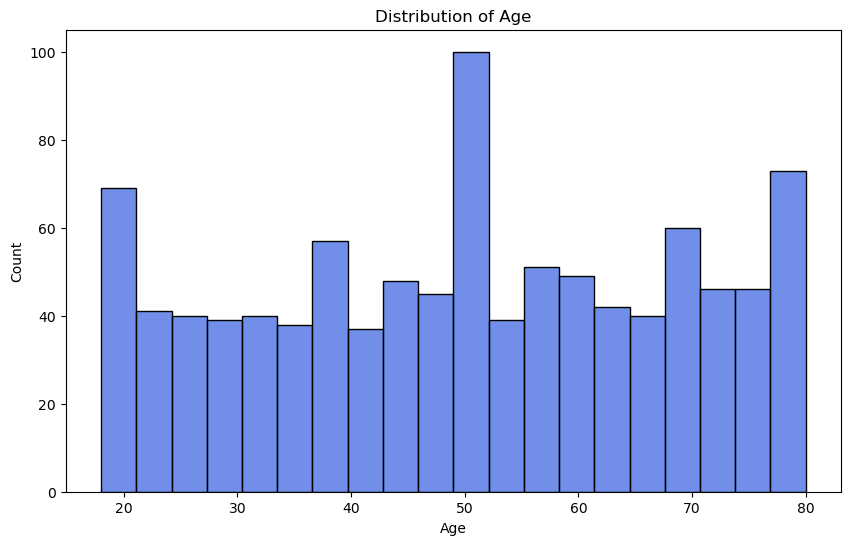

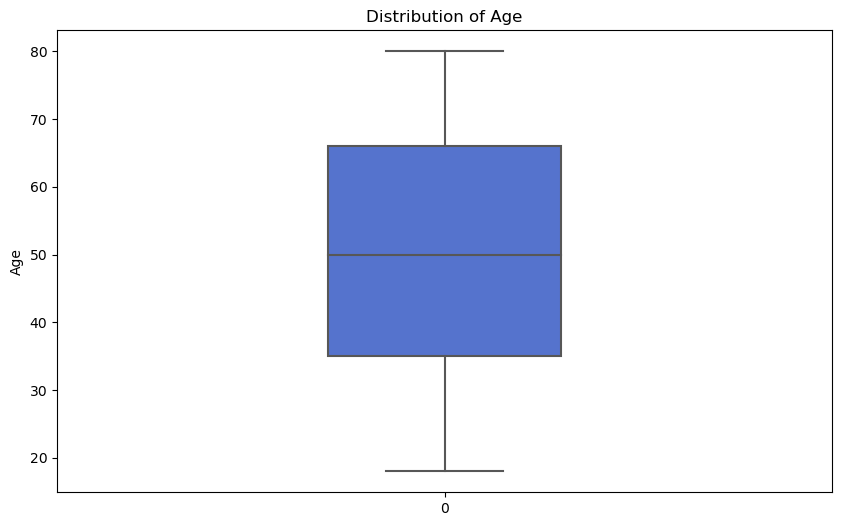

Column: Purchase_Amount
median   251.0
count    1000.000000
mean      250.648000
std       137.515179
min        10.000000
25%       137.000000
50%       251.000000
75%       369.000000
max       500.000000
Name: Purchase_Amount, dtype: float64

Skewness: 0.044 -> Right Skew


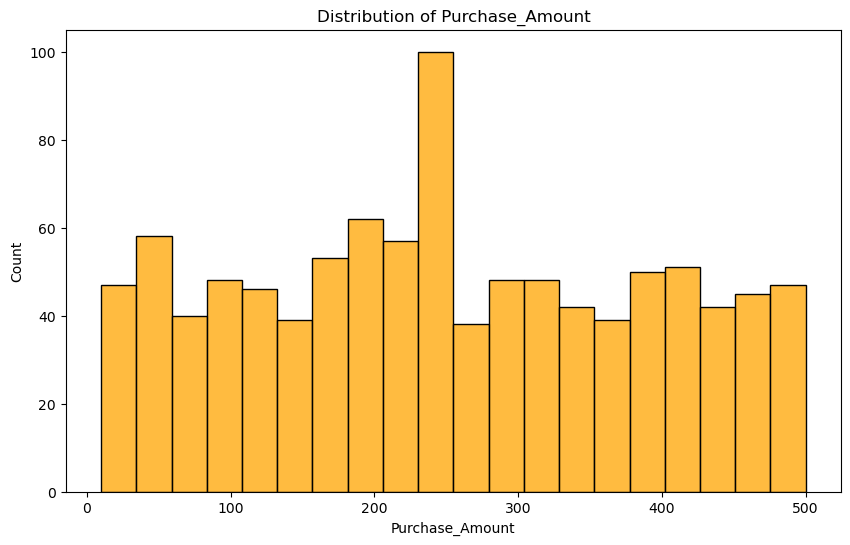

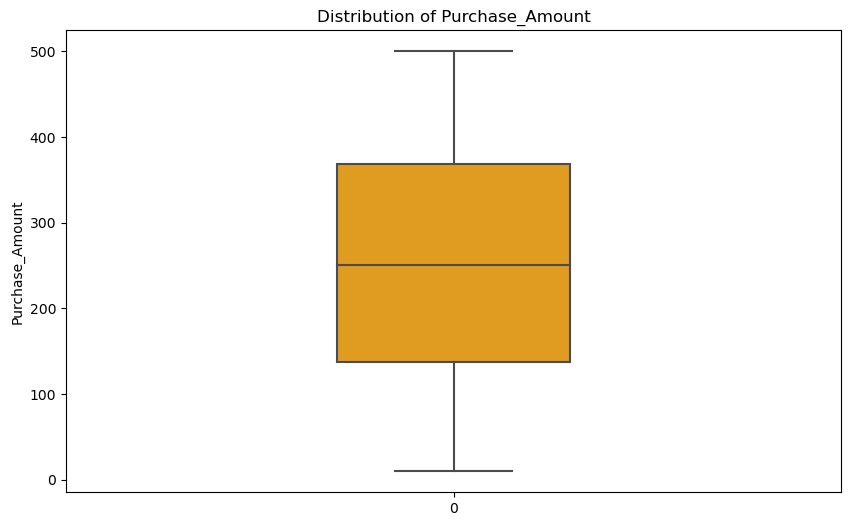

Column: Purchase_Frequency_Per_Month
median   5.0
count    1000.000000
mean        5.413000
std         2.767687
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64

Skewness: 0.104 -> Right Skew


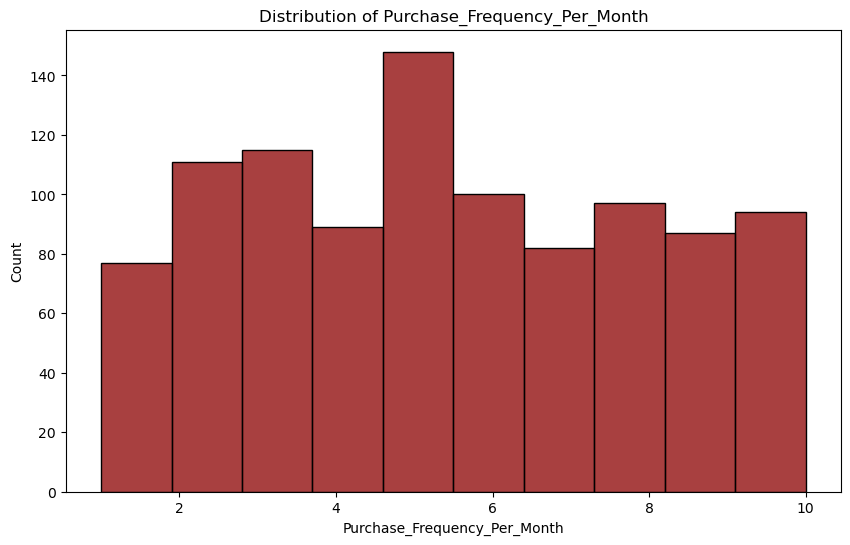

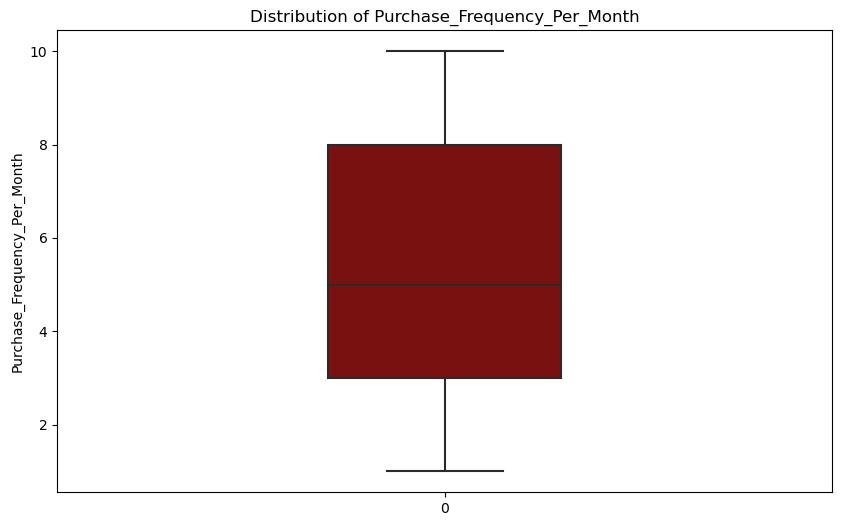

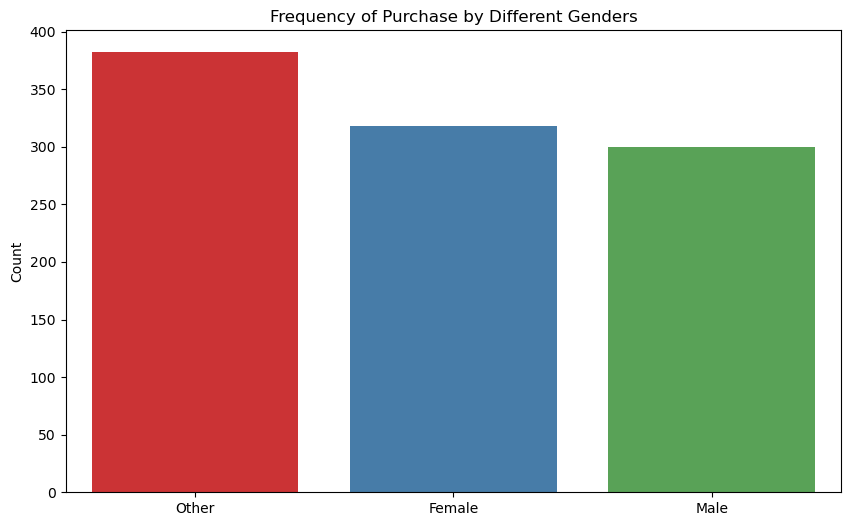

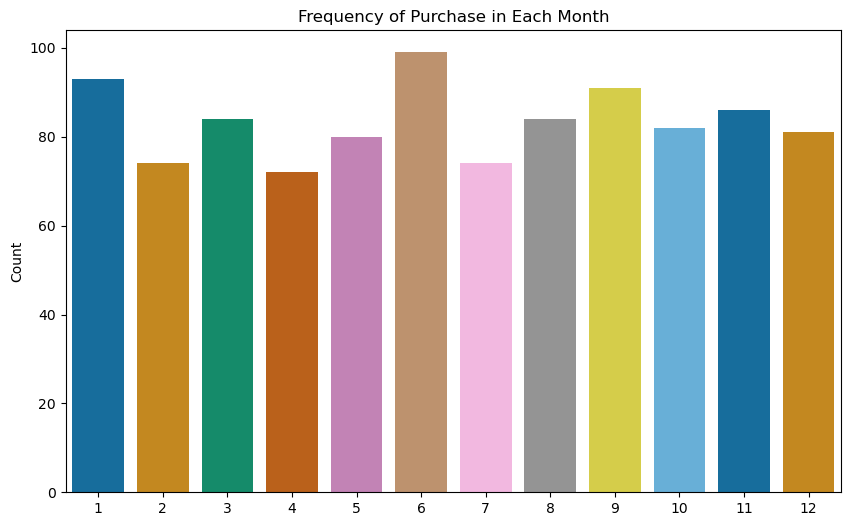

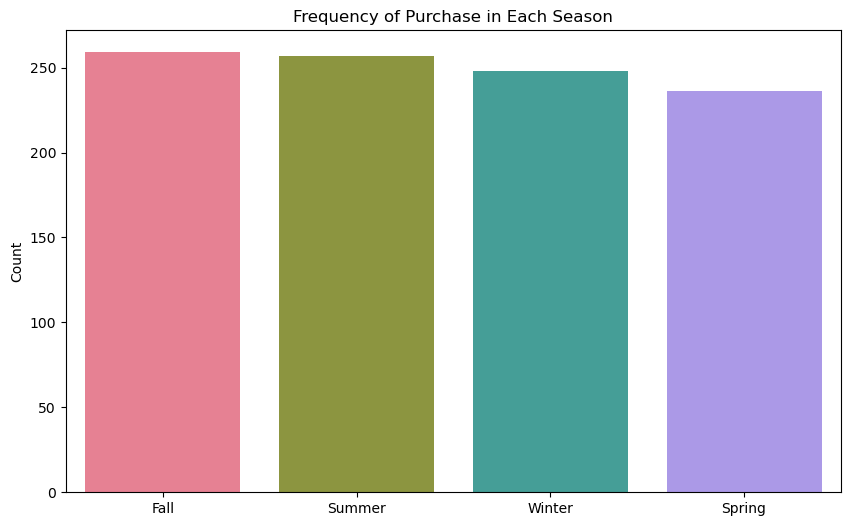

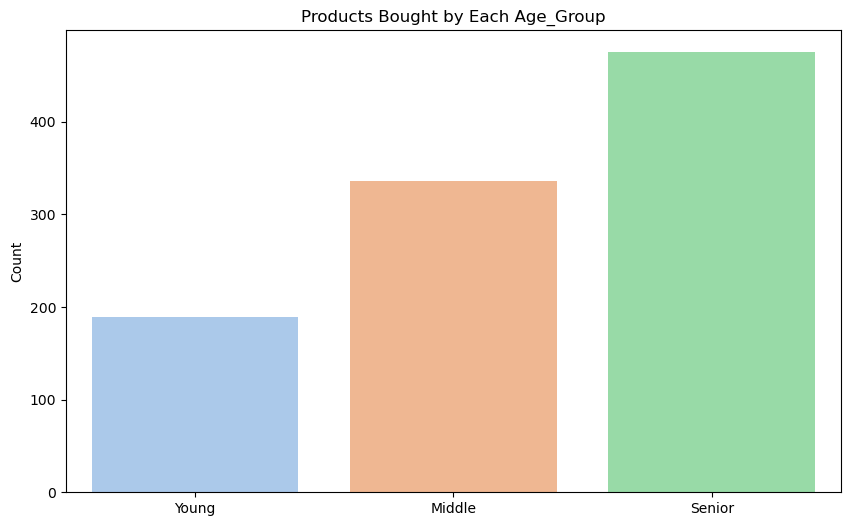

In [404]:
def histogram(n, nbin, title, color):
    print('Column:', n)
    print('median  ', df[n].median())
    print(df[n].describe())
    skewness = skew(df[n])
    print(f'\nSkewness: {skewness:.3f} -> {skewness_label(skewness)}')
    plt.figure(figsize=(10, 6))
    sns.histplot(df[n], bins=nbin, color=color)
    plt.title(title)
    plt.show()

def skewness_label(skewness):
    if skewness > 0:
        return 'Right Skew'
    elif skewness < 0:
        return 'Left Skew'
    else:
        return 'Symmetric'

def boxplot(n, title, color):
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[n], color=color, width=0.3)
    plt.title(title)
    plt.ylabel(n)
    plt.show()

def barplot(df1, title, pal):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df1.index, y=df1.values, palette=pal)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

histogram('Age', 20, 'Distribution of Age', 'royalblue')
boxplot('Age', 'Distribution of Age', 'royalblue')

histogram('Purchase_Amount', 20, 'Distribution of Purchase_Amount', 'orange')
boxplot('Purchase_Amount', 'Distribution of Purchase_Amount', 'orange')

histogram('Purchase_Frequency_Per_Month', 10, 'Distribution of Purchase_Frequency_Per_Month', 'darkred')
boxplot('Purchase_Frequency_Per_Month', 'Distribution of Purchase_Frequency_Per_Month', 'darkred')

df1 = df['Gender'].value_counts()
barplot(df1, 'Frequency of Purchase by Different Genders', 'Set1')

df1 = df['Month'].value_counts()
barplot(df1, 'Frequency of Purchase in Each Month', 'colorblind')

df1 = df['Season'].value_counts()
barplot(df1, 'Frequency of Purchase in Each Season', 'husl')

df1 = df['Age_Group'].value_counts()
barplot(df1, 'Products Bought by Each Age_Group', 'pastel')

### 2. Bivariate Analysis:

<Figure size 1000x600 with 0 Axes>

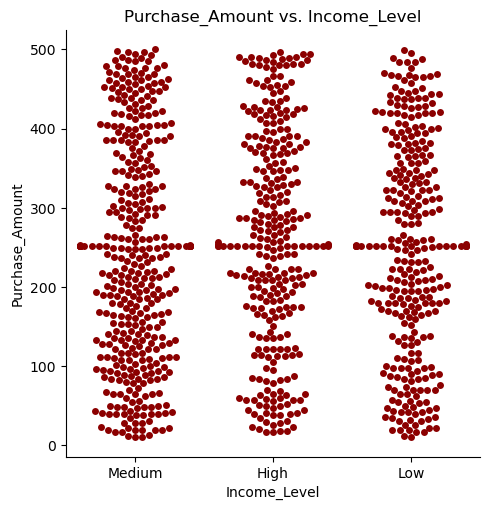

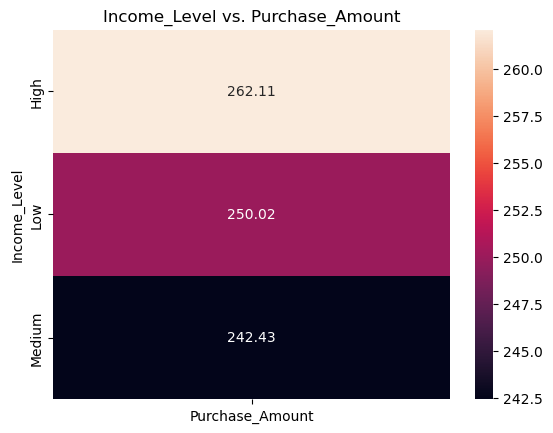

<Figure size 1000x600 with 0 Axes>

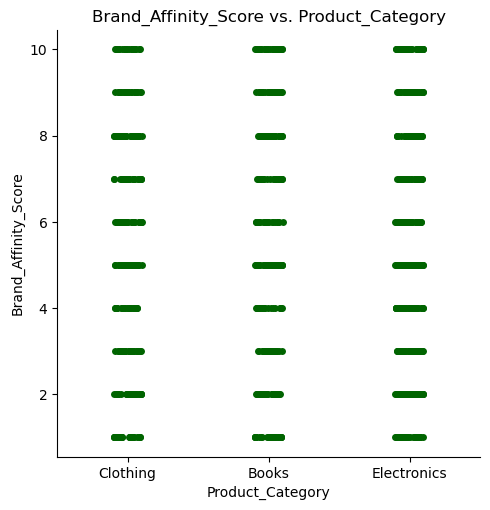

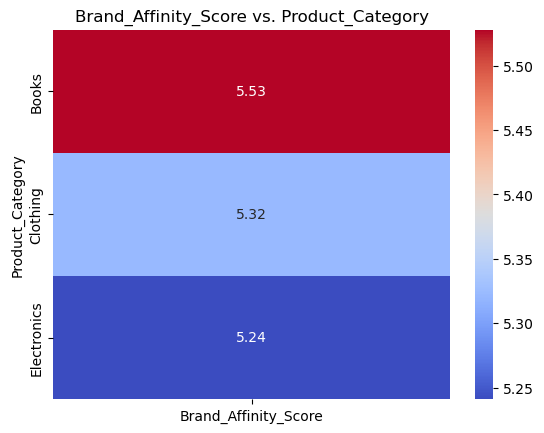

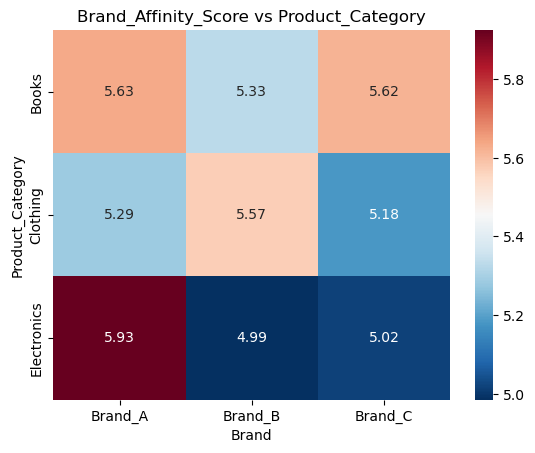

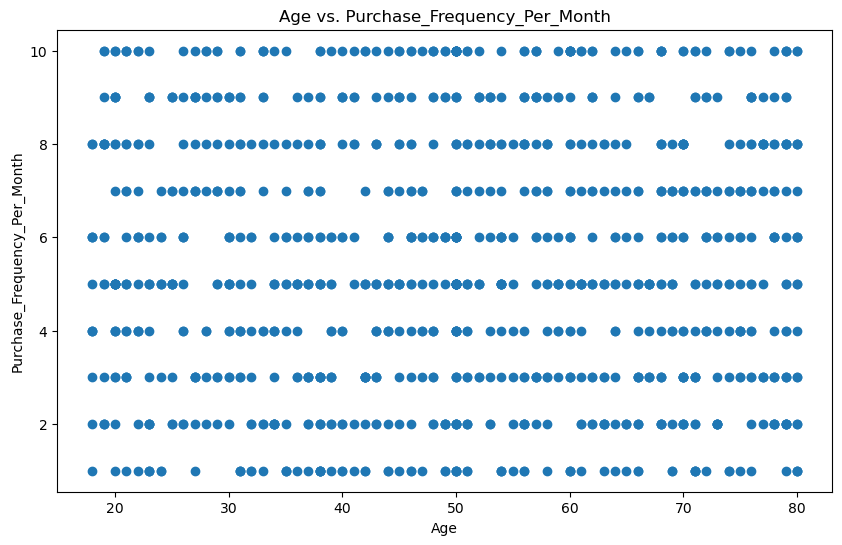

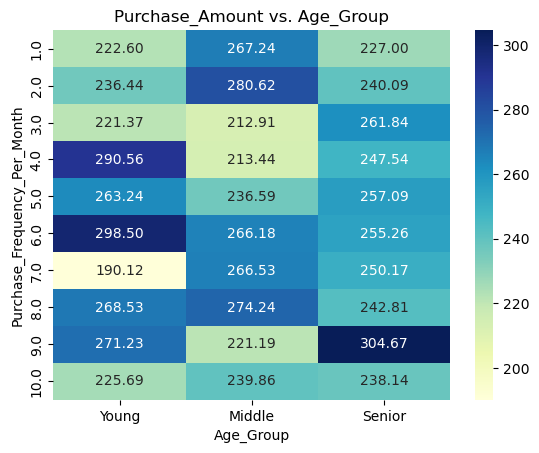

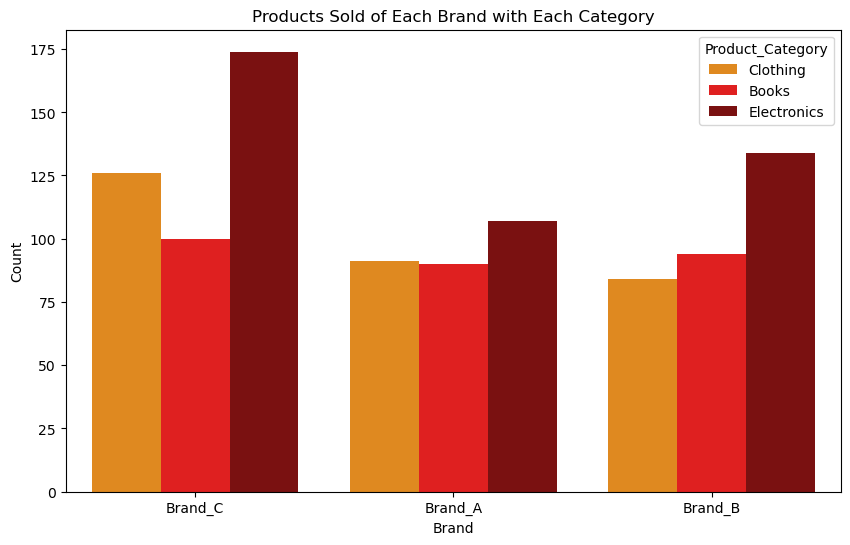

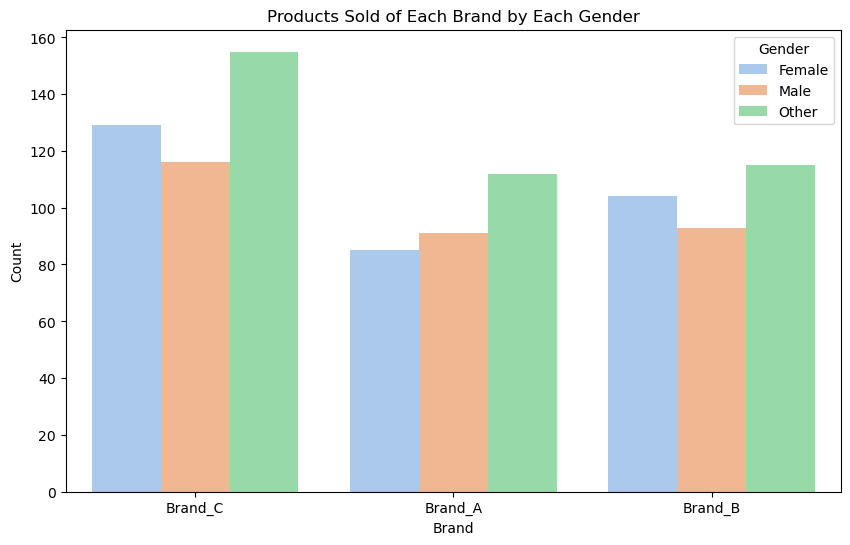

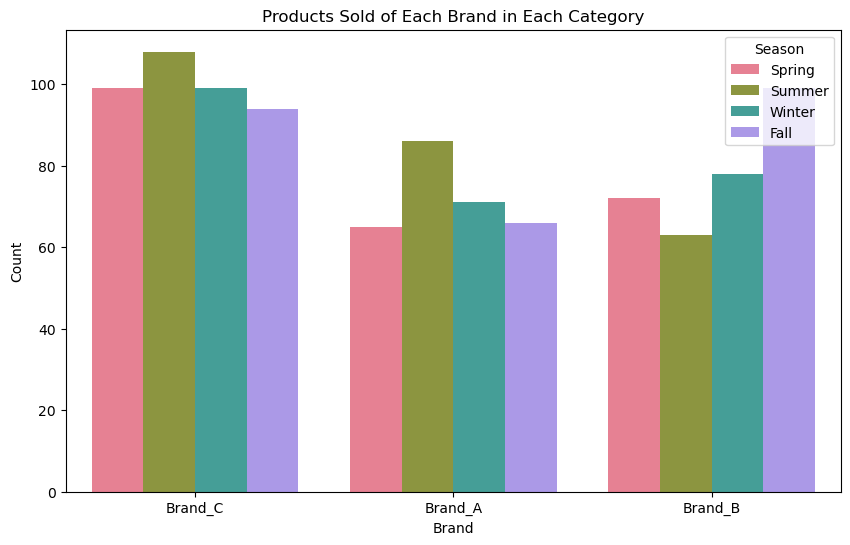

The following is correlation matrix, It shows the correlation of numeric columns of this data with each other
If correlation value is greater than 0 -> Positive Correlation.
If correlation value is less than 0 -> Negative Correlation.
If correlation value is equal 0 -> No Correlation.



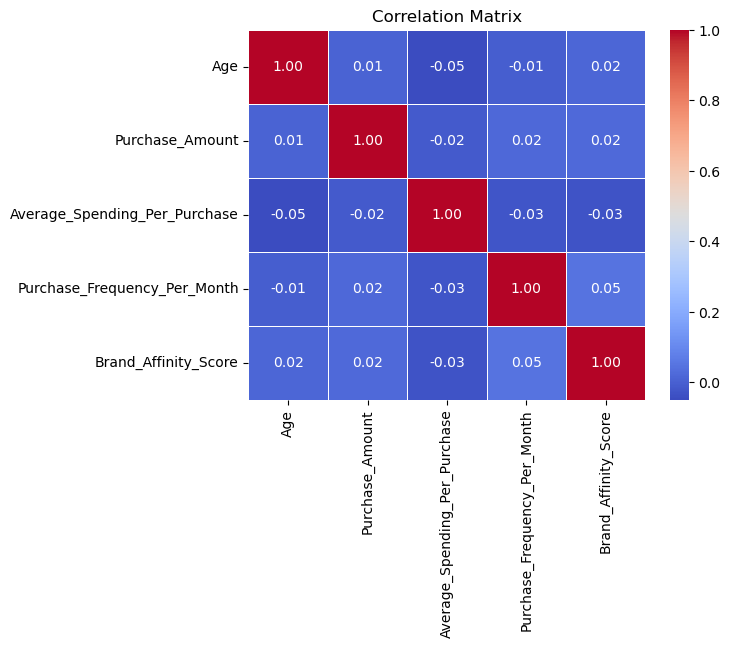

In [405]:
def scatterplot(x, y, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x=x, y=y, data=df)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def catplot(x, y, title, kind, color):
    plt.figure(figsize=(10, 6))
    sns.catplot(x=x, y=y, data=df, kind=kind, color=color)
    plt.title(title)
    plt.show()

def heatmap(i, c, v, title):
    plt.figure(figsize=(10, 6))
    pivot_table = df.pivot_table(index=i, columns=c, values=v, aggfunc='mean')
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

def countplot(n, hue, title, pal):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=n, data=df, hue=hue, palette=pal)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

catplot('Income_Level', 'Purchase_Amount', 'Purchase_Amount vs. Income_Level', 'swarm', 'darkred')
df1 = df.groupby(['Income_Level'])['Purchase_Amount'].mean().reset_index()
pivot = df1.pivot_table(index='Income_Level', values='Purchase_Amount')
sns.heatmap(pivot, cmap='rocket', annot=True, fmt=".2f")
plt.title('Income_Level vs. Purchase_Amount')
plt.show()

catplot('Product_Category', 'Brand_Affinity_Score', 'Brand_Affinity_Score vs. Product_Category', 'strip', 'darkgreen')
df1 = df.groupby(['Product_Category'])['Brand_Affinity_Score'].mean().reset_index()
pivot = df1.pivot_table(index='Product_Category', values='Brand_Affinity_Score')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Brand_Affinity_Score vs. Product_Category')
plt.show()
pivot = df.pivot_table(index='Product_Category', columns='Brand', values='Brand_Affinity_Score', aggfunc='mean')
sns.heatmap(pivot, cmap='RdBu_r', annot=True, fmt=".2f")
plt.title('Brand_Affinity_Score vs Product_Category')
plt.show()

scatterplot('Age', 'Purchase_Frequency_Per_Month', 'Age vs. Purchase_Frequency_Per_Month')
df1 = df.groupby(['Age_Group'])['Purchase_Frequency_Per_Month'].mean().reset_index()
pivot = df.pivot_table(index='Purchase_Frequency_Per_Month', columns='Age_Group', values='Purchase_Amount', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Purchase_Amount vs. Age_Group')
plt.show()

countplot('Brand', 'Product_Category', 'Products Sold of Each Brand with Each Category', ['darkorange', 'red', 'darkred'])
countplot('Brand', 'Gender', 'Products Sold of Each Brand by Each Gender', 'pastel')
countplot('Brand', 'Season', 'Products Sold of Each Brand in Each Category', 'husl')

col = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
correlation_matrix = df[col].corr()
print('The following is correlation matrix, It shows the correlation of numeric columns of this data with each other')
print('If correlation value is greater than 0 -> Positive Correlation.')
print('If correlation value is less than 0 -> Negative Correlation.')
print('If correlation value is equal 0 -> No Correlation.\n')
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### As we can see values are very close to zero, so we can say that there exists very weak correlation between columns

### 3. Temporal Analysis:

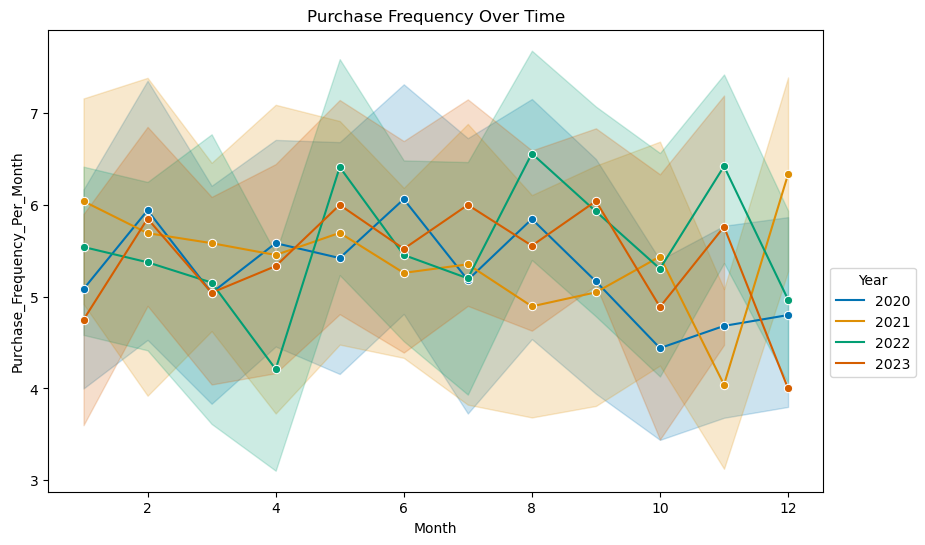

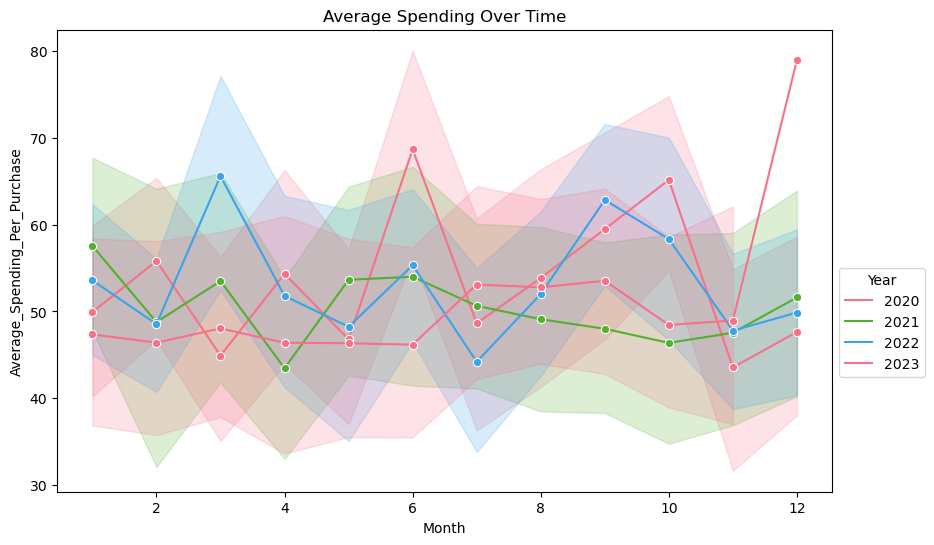

<Figure size 1000x600 with 0 Axes>

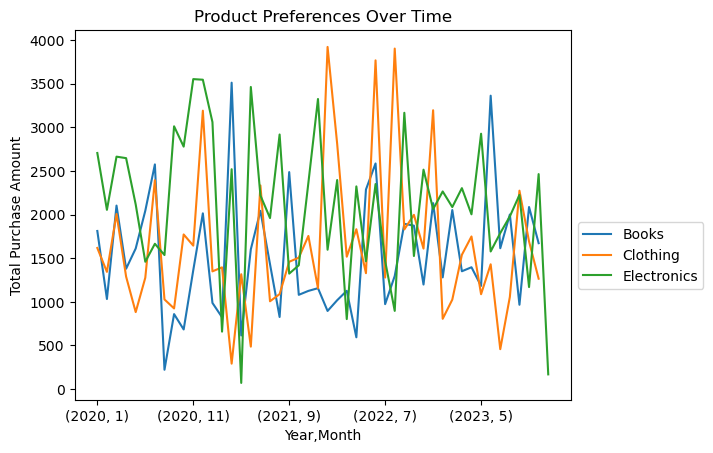

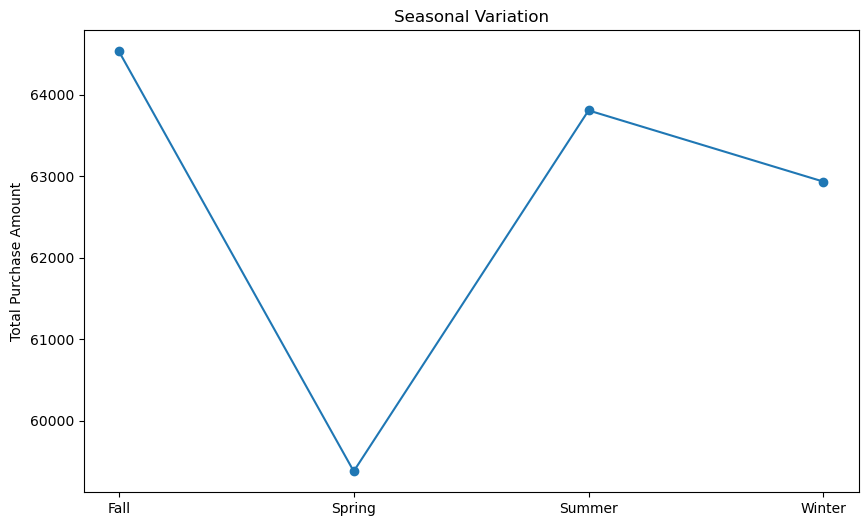

In [406]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Purchase_Frequency_Per_Month', hue='Year', data=df, marker='o', palette='colorblind')
plt.title('Purchase Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Purchase_Frequency_Per_Month')
plt.legend(bbox_to_anchor=(1, 0.5), title='Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Average_Spending_Per_Purchase', hue='Year', data=df, marker='o', palette='husl')
plt.title('Average Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Average_Spending_Per_Purchase')
plt.legend(bbox_to_anchor=(1, 0.5), title='Year')
plt.show()

product_preferences = df.groupby(['Year', 'Month', 'Product_Category'])['Purchase_Amount'].sum().reset_index()
product_preferences_pivot = product_preferences.pivot_table(index=['Year', 'Month'], columns='Product_Category', values='Purchase_Amount')

plt.figure(figsize=(10, 6))
product_preferences_pivot.plot(kind='line')
plt.title('Product Preferences Over Time')
plt.ylabel('Total Purchase Amount')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

seasonal = df.groupby(['Season'])['Purchase_Amount'].sum().reset_index()
pivot = seasonal.pivot_table(index=['Season'], values='Purchase_Amount')

plt.figure(figsize=(10, 6))
plt.plot(pivot.index, pivot['Purchase_Amount'], marker='o')
plt.title('Seasonal Variation')
plt.ylabel('Total Purchase Amount')
plt.show()

## Module 3: Clustering Analysis:

### A. K-Means Clustering:

### 1. Define the number of clusters (k):

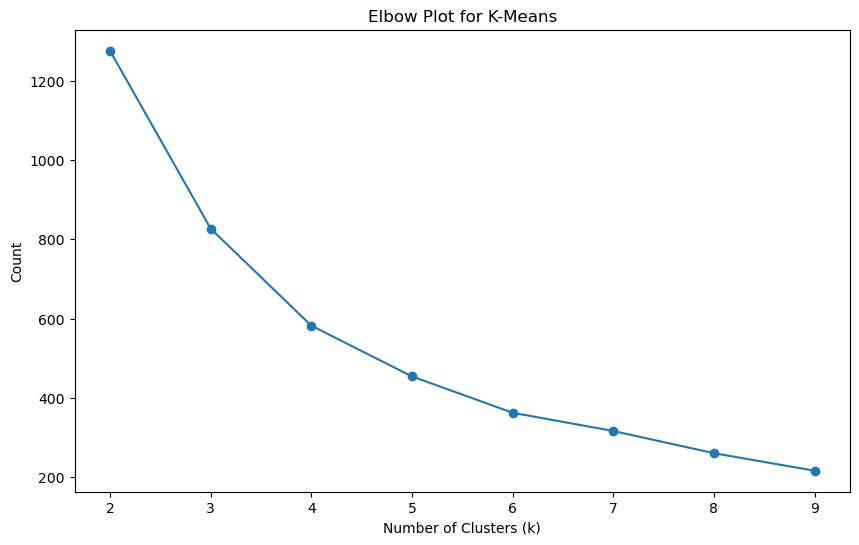

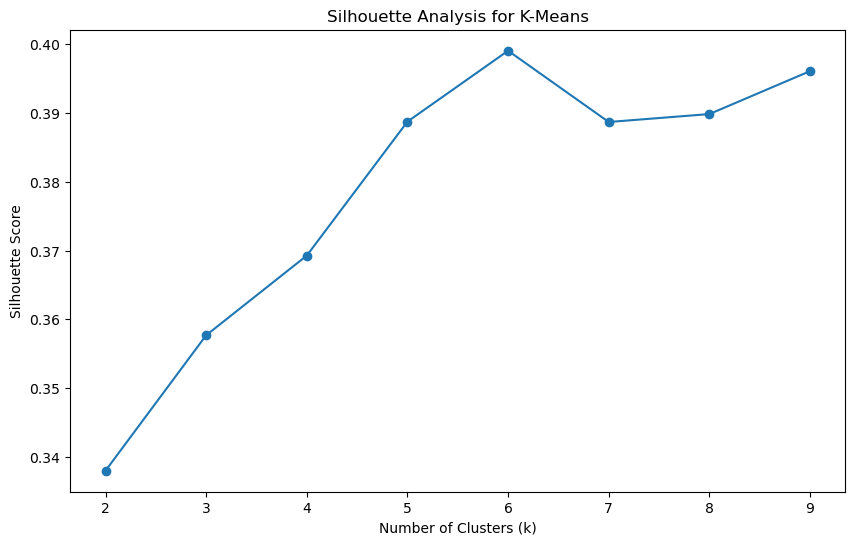

In [407]:
count = []
silhouette_scores_km = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']])
    count.append(kmeans.inertia_)
    silhouette_scores_km.append(silhouette_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), count, marker='o')
plt.title('Elbow Plot for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores_km, marker='o')
plt.title('Silhouette Analysis for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

##### By elbow method we can see that there is a slight changing bend at k = 6, and then if we see silhouette analysis graph, highest silhouette score is also at k = 6, thorugh which we can conclude that the best number of clusters (k) should be 6, so k = 6.

### 2. Apply K-Means algorithm:

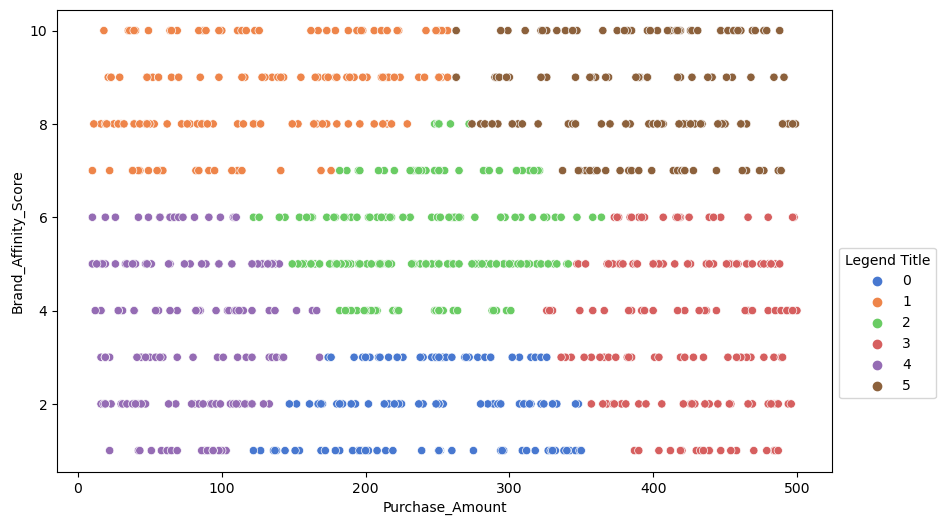

In [408]:
k=6
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df['kmeans_cluster_labels'] = kmeans.fit_predict(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']])
df

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', data=df, hue='kmeans_cluster_labels', palette='muted', legend='full')
plt.legend(bbox_to_anchor=(1, 0.5), title='Legend Title')
plt.show()

### 3. Analyze cluster characteristics:

In [409]:
cols=['Purchase_Amount', 'Brand_Affinity_Score', 'Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase']
kf = df.pivot_table(index = 'kmeans_cluster_labels', values=cols, aggfunc='mean')
kf
kf = df.pivot_table(index = ['kmeans_cluster_labels','Product_Category_Preferences'], values=cols, aggfunc='mean')
kf

Average_Spending_Per_Purchase  \
kmeans_cluster_labels Product_Category_Preferences                                  
0                     High                                              49.541667   
                      Low                                               54.244444   
                      Medium                                            48.777778   
1                     High                                              49.301887   
                      Low                                               56.190476   
                      Medium                                            51.812500   
2                     High                                              53.842857   
                      Low                                               49.329268   
                      Medium                                            57.000000   
3                     High                                              50.285714   
                      Low                                               56.585714   
                      Medium                                            51.781818   
4                     High                                              51.156863   
                      Low                                               50.426230   
                      Medium                                            49.000000   
5                     High                                              48.052632   
                      Low                                               44.482143   
                      Medium                                            53.980392   

                                                    Brand_Affinity_Score  \
kmeans_cluster_labels Product_Category_Preferences                         
0                     High                                      1.812500   
                      Low                                       1.666667   
                      Medium                                    2.200000   
1                     High                                      8.584906   
                      Low                                       8.730159   
                      Medium                                    8.791667   
2                     High                                      5.542857   
                      Low                                       5.560976   
                      Medium                                    5.540984   
3                     High                                      3.551020   
                      Low                                       3.657143   
                      Medium                                    3.781818   
4                     High                                      3.352941   
                      Low                                       3.442623   
                      Medium                                    3.833333   
5                     High                                      8.684211   
                      Low                                       8.571429   
                      Medium                                    8.647059   

                                                    Purchase_Amount  \
kmeans_cluster_labels Product_Category_Preferences                    
0                     High                               252.937500   
                      Low                                254.088889   
                      Medium                             231.555556   
1                     High                               128.566038   
                      Low                                138.285714   
                      Medium                             114.958333   
2                     High                               234.457143   
                      Low                                250.585366   
                      Medium                             239.934426   
3                     High                       

##### Purchase_Frequency_Per_Month has no differences, but other columns have slight difference in values.

### B. DBSCAN Clustering:

### 1. Define eps and MinPts parameters:

In [410]:
eps =  np.linspace(0.1, 1.5, num=7)
minpts = [1, 3, 5, 8, 10, 13, 15]

best_silhouette_score = -1
best_eps = None
best_min = None


for eps in eps:
    for minp in minpts:
        dbscan = DBSCAN(eps=eps, min_samples=minp)
        cluster_labels = dbscan.fit_predict(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']])
#         cluster_labels = dbscan.fit_predict(scaled_data)
        if len(set(cluster_labels)) > 1:
            silhouette = silhouette_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], cluster_labels)
            print('eps: ',eps, 'MinPts: ',minp, 'Silhouette Score: ',silhouette)
            
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min = minp

print('Best eps: ',best_eps,'\nBest MinPt: ',best_min)

eps:  0.1 MinPts:  1 Silhouette Score:  0.42287138097363053
eps:  0.1 MinPts:  3 Silhouette Score:  0.42143872072373356
eps:  0.1 MinPts:  5 Silhouette Score:  0.41929351775501733
eps:  0.1 MinPts:  8 Silhouette Score:  -0.017877387996689295
eps:  0.1 MinPts:  10 Silhouette Score:  -0.2649303943713525
eps:  0.1 MinPts:  13 Silhouette Score:  -0.37164850482909356
eps:  0.1 MinPts:  15 Silhouette Score:  -0.3268023744247397
eps:  0.3333333333333333 MinPts:  1 Silhouette Score:  0.0595102212712287
eps:  0.3333333333333333 MinPts:  3 Silhouette Score:  0.0595102212712287
eps:  0.3333333333333333 MinPts:  5 Silhouette Score:  0.0595102212712287
eps:  0.3333333333333333 MinPts:  8 Silhouette Score:  -0.02186999419417273
eps:  0.3333333333333333 MinPts:  10 Silhouette Score:  -0.07397015507540634
eps:  0.3333333333333333 MinPts:  13 Silhouette Score:  -0.0745871345507953
eps:  0.3333333333333333 MinPts:  15 Silhouette Score:  -0.034593477680931684
Best eps:  0.1 
Best MinPt:  1


### 2. Apply DBSCAN algorithm:

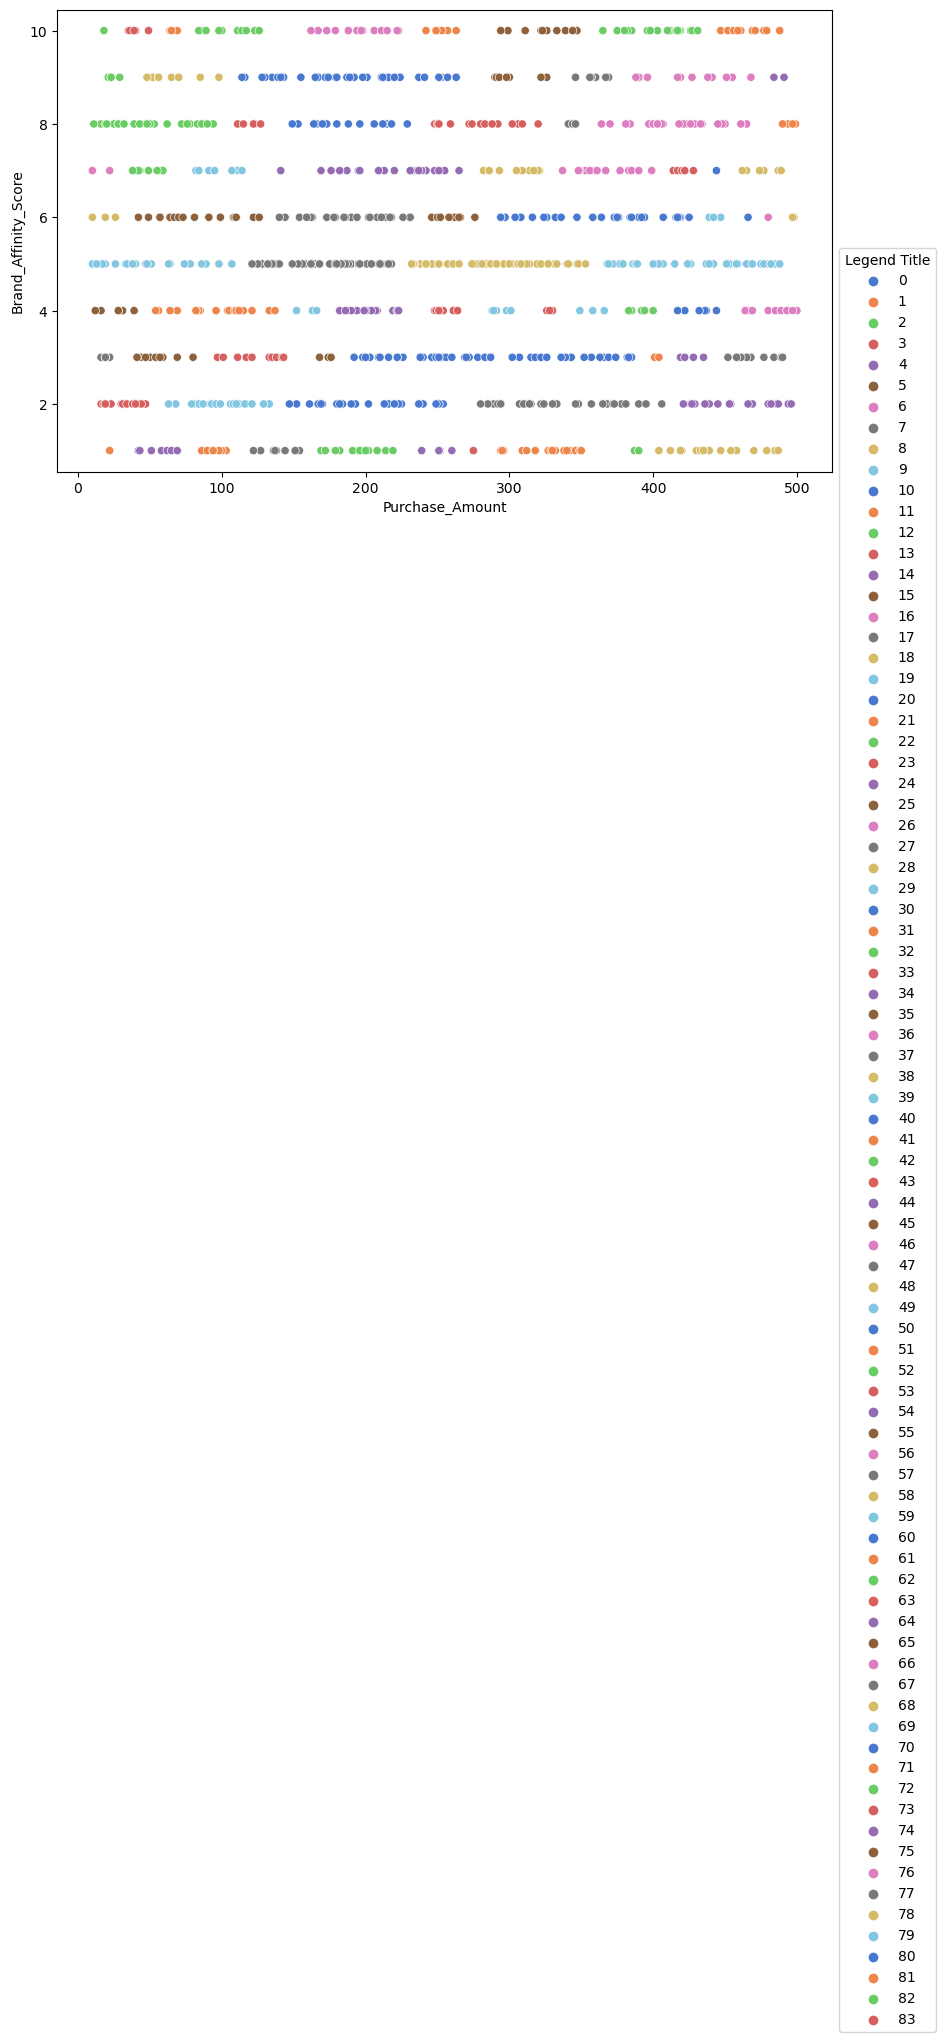

In [411]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min)
df['dbscan_cluster_labels'] = dbscan.fit_predict(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']])
df

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', data=df, hue='dbscan_cluster_labels', palette='muted', legend='full')
plt.legend(bbox_to_anchor=(1, 0.5), title='Legend Title')
plt.show()

### 3. Analyze cluster characteristics:

In [412]:
cols=['Purchase_Amount', 'Brand_Affinity_Score', 'Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase']
kf = df.pivot_table(index = 'dbscan_cluster_labels', values=cols, aggfunc='mean')
kf
kf = df.pivot_table(index = 'dbscan_cluster_labels', values=cols, aggfunc='size')
kf
df[['dbscan_cluster_labels', 'kmeans_cluster_labels']]

,dbscan_cluster_labels,kmeans_cluster_labels
0,0,0
1,1,0
2,2,0
3,3,2
4,4,3
...,...,...
995,17,2
996,75,0
997,20,1
998,24,2


### C. K-Means++ Clustering:

### 1. Apply K-Means++ algorithm:

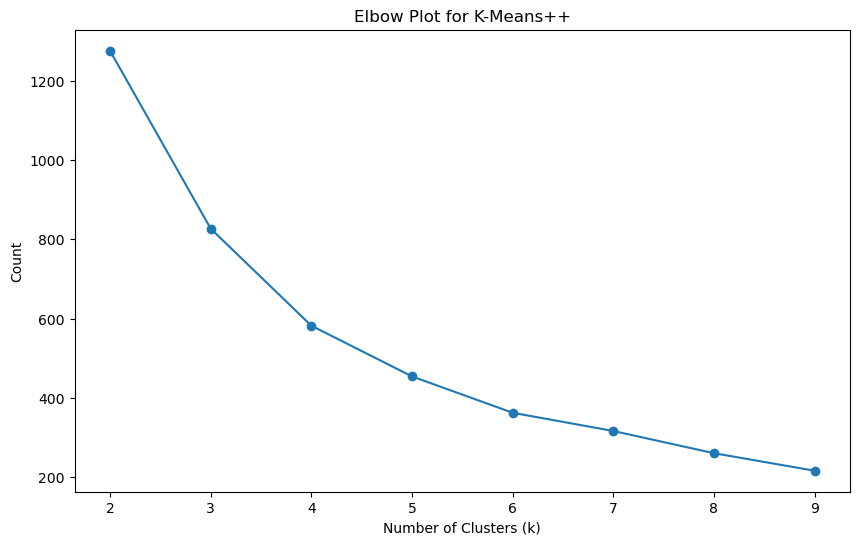

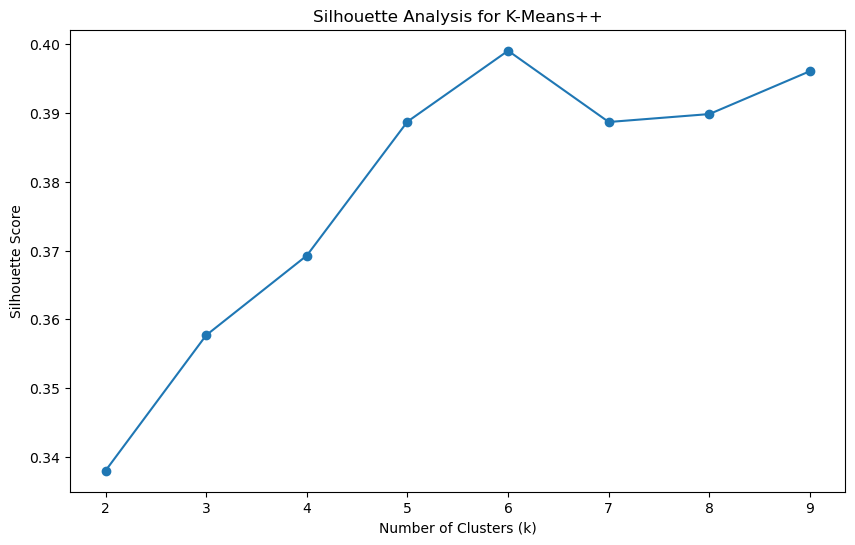

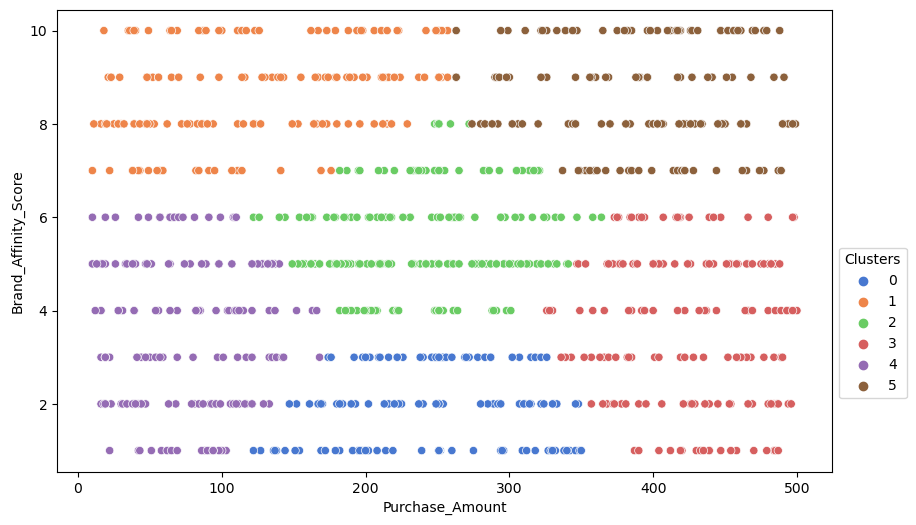

In [413]:
count = []
silhouette_scores_kmpp = []

for k in range(2, 10):
    kmeanspp = KMeans(n_clusters=k, random_state=42, n_init='auto', init='k-means++')
    kmeanspp.fit(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']])
    count.append(kmeanspp.inertia_)
    silhouette_scores_kmpp.append(silhouette_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeanspp.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), count, marker='o')
plt.title('Elbow Plot for K-Means++')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores_kmpp, marker='o')
plt.title('Silhouette Analysis for K-Means++')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

k=6
kmeanspp = KMeans(n_clusters=k, random_state=42, n_init='auto', init='k-means++')
df['kmeans++_cluster_labels'] = kmeanspp.fit_predict(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']])
df

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', data=df, hue='kmeans++_cluster_labels', palette='muted', legend='full')
plt.legend(bbox_to_anchor=(1, 0.5), title='Clusters')
plt.show()

### 2. Compare results to K-Means:

     kmeans_cluster_labels  kmeans++_cluster_labels
0                        0                        0
1                        0                        0
2                        0                        0
3                        2                        2
4                        3                        3
..                     ...                      ...
995                      2                        2
996                      0                        0
997                      1                        1
998                      2                        2
999                      0                        0

[1000 rows x 2 columns]
Inertia of k-means:  362.42762039747083
Inertia of k-means++:  362.42762039747083

Silhouette Score of k-means:  0.3990743219341359
Silhouette Score of k-means++:  0.3990743219341359

Convergence Speed of k-means:  23
Convergence Speed of k-means++ 23


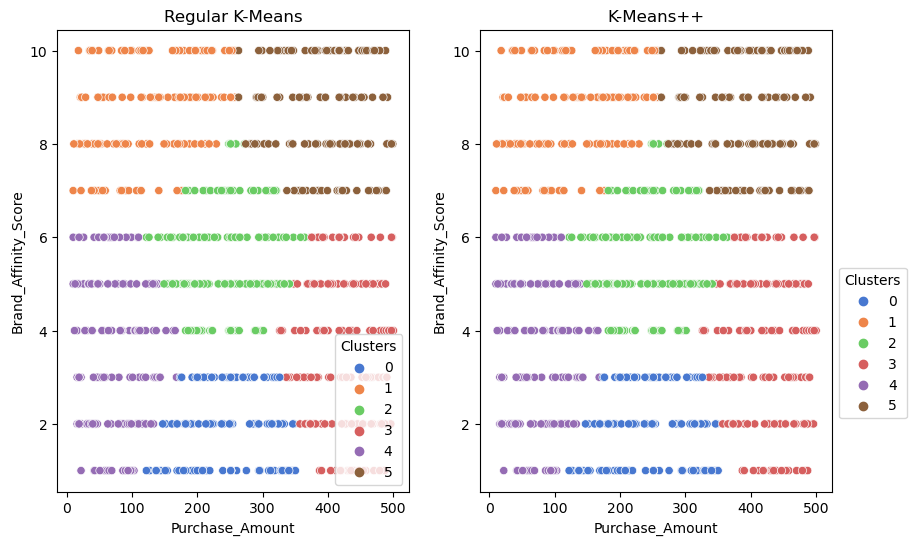

In [414]:
print(df[['kmeans_cluster_labels', 'kmeans++_cluster_labels']])

print('Inertia of k-means: ',kmeans.inertia_)
print('Inertia of k-means++: ',kmeanspp.inertia_)
print()
print('Silhouette Score of k-means: ',silhouette_scores_km[4])
print('Silhouette Score of k-means++: ',silhouette_scores_kmpp[4])
print()
print('Convergence Speed of k-means: ', kmeans.n_iter_)
print('Convergence Speed of k-means++', kmeanspp.n_iter_)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', data=df, hue='kmeans_cluster_labels', palette='muted')
plt.legend(title='Clusters')
plt.title('Regular K-Means')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', data=df, hue='kmeans++_cluster_labels', palette='muted', legend='full')
plt.legend(bbox_to_anchor=(1, 0.5), title='Clusters')
plt.title('K-Means++')

plt.show()

### Module 4: Comparison and Conclusion:

### 1. Compare the results of all three clustering algorithms:

##### In k-means we used elbow method and silhouette analysis to find the value of k(clusters), and we make clusters on two columns Purchase_Amount and Brand_Affinity_Score. In DBscan we used silhouette analysis to find the best eps, and minpts and then we drew clusters using scatter plot. In k-means++ we took the same approach as k-means, just algorithm was k-means++.

##### If we take a look on these different clustering methods, k-means and k-means++ is same, in this given data set, but DBScan is more suitable as it do dense clustering, and it makes clusters more accurately, in k-means and k-means++, no.of clusters were 6, but in DBScan no. of clusters were 9.

##### effectiveness of k-means and k-means++ is same, but DBScan is more effective.

In [415]:
print('K-MEANS')
silhouette = silhouette_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeans.labels_)
print('Silhouette Score for K-Means: ',silhouette)

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeans.labels_)
print('Calinski-Harabasz Score for K-Means: ',calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeans.labels_)
print('Davies-Bouldin Index for K-Means: ',davies_bouldin)

print('K-MEANS++')

silhouette = silhouette_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeanspp.labels_)
print('Silhouette Score for K-Means: ',silhouette)

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeanspp.labels_)
print('Calinski-Harabasz Score for K-Means: ',calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], kmeanspp.labels_)
print('Davies-Bouldin Index for K-Means: ',davies_bouldin)

print('DBSCAN')

silhouette = silhouette_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], dbscan.labels_)
print('Silhouette Score for K-Means: ',silhouette)

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], dbscan.labels_)
print('Calinski-Harabasz Score for K-Means: ',calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_data[['Purchase_Amount', 'Brand_Affinity_Score']], dbscan.labels_)
print('Davies-Bouldin Index for K-Means: ',davies_bouldin)

K-MEANS
Silhouette Score for K-Means:  0.3990743219341359
Calinski-Harabasz Score for K-Means:  898.2466311699866
Davies-Bouldin Index for K-Means:  0.760911996846864
K-MEANS++
Silhouette Score for K-Means:  0.3990743219341359
Calinski-Harabasz Score for K-Means:  898.2466311699866
Davies-Bouldin Index for K-Means:  0.760911996846864
DBSCAN
Silhouette Score for K-Means:  0.42287138097363053
Calinski-Harabasz Score for K-Means:  663.6936443455214
Davies-Bouldin Index for K-Means:  0.6066944205421408


##### K-means is simple and easily scallable, it is sensitive to initial centroids
##### K-means++ is improved version of K-means, it use probablistic approach, whereas K-means use random approach, it is not guarranteed convergence for global optima
##### DBScan handles irregular shape clusters more effectively, it is not good with density variation.
##### By doing above analysis, DBScan is more effective in this case, as it make centroids more accurately.

### 2. Draw conclusions and recommendations:

##### Some Key features from EDA we observe are: 'Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score'

##### Investigate the correlation between each numeric columns